# Normal (or Gaussian) distribution

This lab will introduce the [multivariate normal](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) (multivariate Gaussian) distribution. It is aimed to give a brief explanation and to illustrate how to represent, visualize and sample data from this distribution.



In [2]:
#we import all the required libraries
import numpy as np
import matplotlib.pyplot as plt # for plotting stuff
from matplotlib import cm # Colormaps
from random import seed, shuffle
from scipy.stats import multivariate_normal # for generating synthetic data 
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)

sns.set_style('whitegrid')

#

## Univariate normal distribution

The [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), also known as the Gaussian distribution, is so called because its based on the [Gaussian function](https://en.wikipedia.org/wiki/Gaussian_function). This distribution is defined by two parameters: the [mean](https://en.wikipedia.org/wiki/Mean) $\mu$, which is the expected value of the distribution, and the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) $\sigma$, which corresponds to the expected deviation from the mean. The square of the standard deviation is typically referred to as the [variance](https://en.wikipedia.org/wiki/Variance) $\sigma^2$. We denote this distribution as: 

$$
\mathcal{N}(\mu, \sigma^2)
$$

Given this mean and variance we can calculate the [probability densitiy function (pdf)](https://en.wikipedia.org/wiki/Probability_density_function) of the normal distribution with the normalised Gaussian function. For a value $x$ the density is:


$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp{ \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)}
$$

We call this distribution the univariate normal because it consists of only one random normal variable. Three examples of univariate normal distributions with different mean and variance are plotted in the next figure:

In [3]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

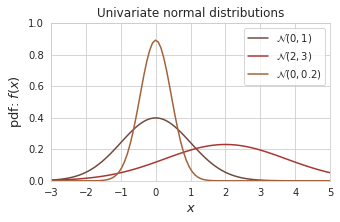

In [4]:
# Plot different Univariate Normals
x = np.linspace(-3, 5, num=100)
fig = plt.figure(figsize=(5, 3))
plt.plot(
    x, univariate_normal(x, mean=0, variance=1), 
    label="$\mathcal{N}(0, 1)$", color='#714A41')
plt.plot(
    x, univariate_normal(x, mean=2, variance=3), 
    label="$\mathcal{N}(2, 3)$",color='#A73730')
plt.plot(
    x, univariate_normal(x, mean=0, variance=0.2), 
    label="$\mathcal{N}(0, 0.2)$",color='#A3623B')
plt.xlabel('$x$', fontsize=13)
plt.ylabel('pdf: $f(x)$', fontsize=13)
plt.title('Univariate normal distributions')
plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc=1)
fig.subplots_adjust(bottom=0.15)
plt.show()
#

## Multivariate normal distribution

The [multivariate normal](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) distribution is a multidimensional generalisation of the one-dimensional [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution). It represents the distribution of a [multivariate random variable](https://en.wikipedia.org/wiki/Multivariate_random_variable) that is made up of multiple random variables that can be correlated with each other.

Like the normal distribution, the multivariate normal is defined by sets of parameters: the mean vector $\mathbf{\mu}$, which is the expected value of the distribution; and the [covariance](https://en.wikipedia.org/wiki/Covariance) matrix $\Sigma$, which measures how dependent two random variables are and how they change together. We denote the covariance between variable $X$ and $Y$ as $C(X,Y)$. 

The multivariate normal with dimensionality $d$ has a [joint probability](https://en.wikipedia.org/wiki/Joint_probability_distribution) density given by:

$$
p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
$$

Where $\mathbf{x}$ a random vector of size $d$, $\mathbf{\mu}$ is the mean vector, $\Sigma$ is the ([symmetric](https://en.wikipedia.org/wiki/Symmetric_matrix), [positive definite](https://en.wikipedia.org/wiki/Positive-definite_matrix)) covariance matrix (of size $d \times d$), and $\lvert\Sigma\rvert$ its [determinant](https://en.wikipedia.org/wiki/Determinant). We denote this multivariate normal distribution as: 

$$
\mathcal{N}(\mathbf{\mu}, \Sigma)
$$

In [207]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

Examples of two bivariate normal distributions are plotted below.

The figure on the left is a bivariate distribution with the covariance between $x_1$ and $x_2$ set to $0$ so that these 2 variables are independent:

$$
\mathcal{N}\left(
\begin{bmatrix}
0 \\
0
\end{bmatrix}, 
\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}\right)
$$


The figure on the right is a bivariate distribution with the covariance between $x_1$ and $x_2$ set to be different than $0$ so that both variables are correlated. Increasing $x_1$ will increase the probability that $x_2$ will also increase:


$$
\mathcal{N}\left(
\begin{bmatrix}
0 \\
1
\end{bmatrix}, 
\begin{bmatrix}
1 & 0.8 \\
0.8 & 1
\end{bmatrix}\right)
$$

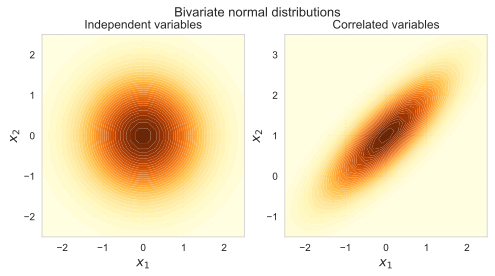

In [208]:
# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 50 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

d = 2  # number of dimensions

# Plot of independent Normals
bivariate_mean = np.matrix([[0.], [0.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.], 
    [0., 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax1.contourf(x1, x2, p, 33, cmap=cm.YlOrBr)
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.axis([-2.5, 2.5, -2.5, 2.5])
ax1.set_aspect('equal')
ax1.set_title('Independent variables', fontsize=12)

# Plot of correlated Normals
bivariate_mean = np.matrix([[0.], [1.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.8], 
    [0.8, 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax2.contourf(x1, x2, p, 33, cmap=cm.YlOrBr)
ax2.set_xlabel('$x_1$', fontsize=13)
ax2.set_ylabel('$x_2$', fontsize=13)
ax2.axis([-2.5, 2.5, -1.5, 3.5])
ax2.set_aspect('equal')
ax2.set_title('Correlated variables', fontsize=12)

# Add title
plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
plt.show()
#

### Affine transformations of the multivariate normal
 
It is possible to transform a [multivariate normal](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Affine_transformation) distribution into a new normal distribution with an [affine transformation](https://en.wikipedia.org/wiki/Affine_transformation). More specifically if $X$ is normally distributed and $Y = LX + u$ with $L$ a [linear transformation](https://en.wikipedia.org/wiki/Linear_map) and $u$ a vector then $Y$ is also normally distributed with mean $\mu_{Y} = u + L\mu_{X}$ and covariance matrix $\Sigma_{Y} = L\Sigma_{X}L^T$.

$$Y \sim \mathcal{N}(\mu_{Y}, \Sigma_{Y}) \quad\quad X \sim \mathcal{N}(\mu_{X}, \Sigma_{X}) \\
\mathcal{N}(\mu_{Y}, \Sigma_{Y}) = \mathcal{N}(u + L\mu_{X}, L\Sigma_{X}L^T) = L\mathcal{N}(\mu_{X}, \Sigma_{X}) + u$$

This can be proven as follows:

$$\mu_{Y} = \mathbb{E}[Y] = \mathbb{E}[LX + u] = \mathbb{E}[LX] + u = L\mu_{X} + u$$

$$\begin{split}
\Sigma_{Y} & = \mathbb{E}[(Y-\mu_{Y})(Y-\mu_{Y})^\top] \\
           & = \mathbb{E}[(LX+u - L\mu_{X}-u)(LX+u - L\mu_{X}-u)^\top] \\
           & = \mathbb{E}[(L(X-\mu_{X})) (L(X-\mu_{X}))^\top] \\
           & = \mathbb{E}[L(X-\mu_{X}) (X-\mu_{X})^\top L^\top] \\
           & = L\mathbb{E}[(X-\mu_{X})(X-\mu_{X})^\top]L^\top \\
           & = L\Sigma_{X}L^\top
\end{split}$$

## Sampling from a multivariate normal

The previous formula helps us to [sample from any multivariate Guassian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Drawing_values_from_the_distribution).  
To do this sampling we can sample $X$ from the standard normal distribution $X \sim \mathcal{N}(0, I_d)$, where the mean is the vector $\mu=0$ and the covariance is the [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix) $\Sigma=I_d$. Sampling from this distribution is easier because each variable in $X$ is [independent](https://en.wikipedia.org/wiki/Linear_independence) from all other variables, we can just sample each variable separately.

It is then possible to sample $Y$ from $\mathcal{N}(\mu_{Y}, \Sigma_{Y})$ by sampling $X$ and applying the affine transform on the samples. This transform is $Y = LX + u$ where we know from the previous section that the covariance of $Y$ will be $\Sigma_{Y} = L\Sigma_{X}L^\top$. Since $\Sigma_{X}=I_d$ we can write that $\Sigma_{Y} = L I_d L^\top = L L^\top$. $L$ can now be found by a technique called the [Cholesky decompostion](https://en.wikipedia.org/wiki/Cholesky_decomposition) which does exactly the decomposition we need. The vector $u$ is then $\mu_{Y}$ since $\mu_{X}=0$ ($u = \mu_{Y} - L\mu_{X}$).

Lets try this out by sampling 50 samples from:

$$
Y
\sim
\mathcal{N}\left(
\begin{bmatrix} 0 \\ 
1 
\end{bmatrix},
\begin{bmatrix}
1 & 0.8 \\
0.8 & 1
\end{bmatrix}\right)
$$

The sampling is done by the following code and the samples are plotted as red dots on the probability density surface below.

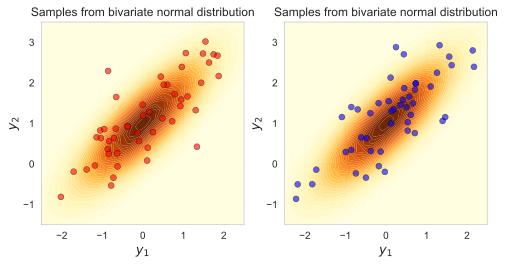

In [209]:
# Plot the samples and the distribution
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

# Option 1:
d = 2 # Number of dimensions
mean = np.matrix([[0.], [1.]])
covariance = np.matrix([
    [1, 0.8], 
    [0.8, 1]
])

# Create L
L = np.linalg.cholesky(covariance)
# Sample X from standard normal
n = 50  # Samples to draw
X = np.random.normal(size=(d, n))
# Apply the transformation
Y = L.dot(X) + mean

# Plot bivariate distribution
x1, x2, p = generate_surface(mean, covariance, d)
con = ax1.contourf(x1, x2, p, 33, cmap=cm.YlOrBr)
con = ax2.contourf(x1, x2, p, 33, cmap=cm.YlOrBr)
# Plot samples
ax1.plot(Y[0,:], Y[1,:], 'ro', alpha=.6,
        markeredgecolor='k', markeredgewidth=0.5)
ax1.set_xlabel('$y_1$', fontsize=13)
ax1.set_ylabel('$y_2$', fontsize=13)
ax1.axis([-2.5, 2.5, -1.5, 3.5])
ax1.set_aspect('equal')
ax1.set_title('Samples from bivariate normal distribution')

#Option 2:
#Our code from Lab 1 for generating synthetic data
from scipy.stats import multivariate_normal  
def gen_gaussian(size, mean_in, cov_in):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        return nv,X
mu1, sigma1 = [0,1], [[1, 0.8], [0.8, 1]]
nv1, X1= gen_gaussian(n, mu1, sigma1) 
# Plot the samples and the distribution

# Plot bivariate distribution
ax2.set_xlabel('$y_1$', fontsize=13)
ax2.set_ylabel('$y_2$', fontsize=13)
ax2.axis([-2.5, 2.5, -1.5, 3.5])
ax2.set_aspect('equal')
ax2.set_title('Samples from bivariate normal distribution')
#plt.scatter(X1[:, 0], X1[:, 1], color='#378661', marker='x', s=30, linewidth=1.5)
ax2.plot(X1[:,0], X1[:,1], 'bo', alpha=.6, markeredgecolor='k', markeredgewidth=0.5)



plt.show()
#

This lab is partly based on Python notebook file from Peter Roelands. [Link to the full IPython notebook file](https://github.com/peterroelants/peterroelants.github.io/blob/main/notebooks/misc/multivariate-normal-primer.ipynb)